# Evaluation metrics AP Recall IoU

In [1]:
from ultralytics import YOLO


In [41]:
############### YOLOv8 ###############
MODEL_PATH = "output_tensor/yolov8/weights/best.pt"

AC_model = YOLO(model=MODEL_PATH)

results = AC_model(source="data/GDIT_dataset/train/images", conf = 0.1, save = True,
                        save_txt = True, save_conf = True, project = "data/GDIT_eval/yolov8_inference/")  # predict on unseen images

results1 = AC_model(source="data/GDIT_dataset/test/images", conf = 0.1, save = True,
                        save_txt = True, save_conf = True, project = "data/GDIT_eval/yolov8_inference/")  # predict on unseen images

results2 = AC_model(source="data/GDIT_dataset/valid/images", conf = 0.1, save = True,
                        save_txt = True, save_conf = True, project = "data/GDIT_eval/yolov8_inference/")  # predict on unseen images



image 1/708 /home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/images/airport_102_jpg.rf.0bc87c7c57f68d9a0acb281b532ce2f8.jpg: 512x512 9 Aircrafts, 8.7ms
image 2/708 /home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/images/airport_102_jpg.rf.66a4aaa8e7aea504aa7b74ad85d0212e.jpg: 512x512 9 Aircrafts, 8.6ms
image 3/708 /home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/images/airport_102_jpg.rf.b7a6c72b0e27ca6bd7e393b73e16319b.jpg: 512x512 9 Aircrafts, 8.7ms
image 4/708 /home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/images/airport_103_jpg.rf.276280193b3e71b4d17f2653ca4b8369.jpg: 512x512 7 Aircrafts, 12.1ms
image 5/708 /home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/images/airport_103_jpg.rf.86d22b81e39258c70a3ae564ed524669.jpg: 512x512 7 Aircrafts, 8.7ms
image 6/708 /home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/images/airport_103_jpg.rf.8f798c41fe3e9bda1974753b242b270b.jpg: 512x5

In [36]:
############### YOLOv5 ###############
!python algorithms/yolov5/detect.py --weights output_tensor/yolov5/weights/best.pt --conf 0.3 --source data/GDIT_dataset/train/images  --save-txt --save-conf 
!python algorithms/yolov5/detect.py --weights output_tensor/yolov5/weights/best.pt --conf 0.3 --source data/GDIT_dataset/test/images  --save-txt --save-conf  
!python algorithms/yolov5/detect.py --weights output_tensor/yolov5/weights/best.pt --conf 0.3 --source data/GDIT_dataset/valid/images  --save-txt --save-conf  


detect: weights=['output_tensor/yolov5/weights/best.pt'], source=data/GDIT_dataset/train/images, data=algorithms/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=algorithms/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-272-gde64179 Python-3.8.18 torch-2.0.1 CUDA:0 (NVIDIA RTX A6000, 48677MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
image 1/708 /home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/images/airport_102_jpg.rf.0bc87c7c57f68d9a0acb281b532ce2f8.jpg: 640x640 10 Aircrafts, 11.9ms
image 2/708 /home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/images/airport_102_jpg.r

In [7]:
###############   SSD  ###############
!python image_inference.py data/GDIT_dataset/train/images output_tensor/ssd/ssd_hrplanesv2.py --weights output_tensor/ssd/best.pth --out-dir data/GDIT_eval/ssd_inference/predict_train --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/test/images output_tensor/ssd/ssd_hrplanesv2.py --weights output_tensor/ssd/best.pth --out-dir data/GDIT_eval/ssd_inference/predict_train --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/valid/images output_tensor/ssd/ssd_hrplanesv2.py --weights output_tensor/ssd/best.pth --out-dir data/GDIT_eval/ssd_inference/predict_val --pred-score-thr 0.3


Loads checkpoint by local backend from path: output_tensor/ssd/best.pth
01/23 15:32:17 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
01/23 15:32:17 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/safouane/.local/lib/python3.8/site-packages/mmengine/visualization/visuali━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0 it/s  
zer.py:757: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may 
not be in the image
  warnings.warn(
/home/safouane/.local/lib/python3.8/site-packages/mmengine/visualization/visualim━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0 it/s  
zer.py:828: UserWarning: Warning: The polygon is out of bounds, the drawn 
polygon may not b

In [15]:
############# Faster RCNN ############
!python image_inference.py data/GDIT_dataset/train/images output_tensor/faster-rcnn/faster-rcnn_hrplanesv2.py --weights output_tensor/faster-rcnn/best.pth --out-dir data/GDIT_eval/faster-rcnn_inference/predict_train --pred-score-thr 0.5
!python image_inference.py data/GDIT_dataset/test/images output_tensor/faster-rcnn/faster-rcnn_hrplanesv2.py --weights output_tensor/faster-rcnn/best.pth --out-dir data/GDIT_eval/faster-rcnn_inference/predict_test --pred-score-thr 0.5
!python image_inference.py data/GDIT_dataset/valid/images output_tensor/faster-rcnn/faster-rcnn_hrplanesv2.py --weights output_tensor/faster-rcnn/best.pth --out-dir data/GDIT_eval/faster-rcnn_inference/predict_val --pred-score-thr 0.5


Loads checkpoint by local backend from path: output_tensor/faster-rcnn/best.pth
01/23 19:26:18 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
01/23 19:26:18 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/safouane/.local/lib/python3.8/site-packages/mmengine/visualization/visuali━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1 it/s  
zer.py:757: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may 
not be in the image
  warnings.warn(
/home/safouane/.local/lib/python3.8/site-packages/mmengine/visualization/visualim━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1 it/s  
zer.py:828: UserWarning: Warning: The polygon is out of bounds, the drawn 
polygon may

In [1]:
############# RetinaNet ##############
!python image_inference.py data/GDIT_dataset/train/images output_tensor/retinanet/retinanet_hrplanesv2.py --weights output_tensor/retinanet/best.pth --out-dir data/GDIT_eval/retinanet_inference/predict_train --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/test/images output_tensor/retinanet/retinanet_hrplanesv2.py --weights output_tensor/retinanet/best.pth --out-dir data/GDIT_eval/retinanet_inference/predict_test --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/valid/images output_tensor/retinanet/retinanet_hrplanesv2.py --weights output_tensor/retinanet/best.pth --out-dir data/GDIT_eval/retinanet_inference/predict_val --pred-score-thr 0.3


Loads checkpoint by local backend from path: output_tensor/retinanet/best.pth
01/23 18:52:12 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
01/23 18:52:12 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/safouane/.local/lib/python3.8/site-packages/mmengine/visualization/visuali━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5 it/s  
zer.py:757: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may 
not be in the image
  warnings.warn(
/home/safouane/.local/lib/python3.8/site-packages/mmengine/visualization/visualim━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5 it/s  
zer.py:828: UserWarning: Warning: The polygon is out of bounds, the drawn 
polygon may n

In [2]:
############# CenterNet ##############
!python image_inference.py data/GDIT_dataset/train/images output_tensor/centernet/centernet_hrplanesv2.py --weights output_tensor/centernet/best.pth --out-dir data/GDIT_eval/centernet_inference/predict_train --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/test/images output_tensor/centernet/centernet_hrplanesv2.py --weights output_tensor/centernet/best.pth --out-dir data/GDIT_eval/centernet_inference/predict_test --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/valid/images output_tensor/centernet/centernet_hrplanesv2.py --weights output_tensor/centernet/best.pth --out-dir data/GDIT_eval/centernet_inference/predict_val --pred-score-thr 0.3


Loads checkpoint by local backend from path: output_tensor/centernet/best.pth
01/23 18:54:07 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
01/23 18:54:07 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/safouane/miniconda3/envs/openmmlab/lib/python3.8/site-packages/torch/funct━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
ional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be 
required to pass the indexing argument. (Triggered internally at 
/opt/conda/conda-bld/pytorch_1682343962757/work/aten/src/ATen/native/TensorShape
.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/safouane/.local/lib/pytho

In [16]:
###############  DETR  ###############
!python image_inference.py data/GDIT_dataset/train/images output_tensor/detr/detr_hrplanesv2.py --weights output_tensor/detr/best.pth --out-dir data/GDIT_eval/detr_inference/predict_train --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/test/images output_tensor/detr/detr_hrplanesv2.py --weights output_tensor/detr/best.pth --out-dir data/GDIT_eval/detr_inference/predict_test --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/valid/images output_tensor/detr/detr_hrplanesv2.py --weights output_tensor/detr/best.pth --out-dir data/GDIT_eval/detr_inference/predict_val --pred-score-thr 0.3


Loads checkpoint by local backend from path: output_tensor/detr/best.pth
01/23 16:19:19 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
01/23 16:19:19 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/safouane/.local/lib/python3.8/site-packages/mmengine/visualization/visuali━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9 it/s  
zer.py:757: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may 
not be in the image
  warnings.warn(
/home/safouane/.local/lib/python3.8/site-packages/mmengine/visualization/visualim━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9 it/s  
zer.py:828: UserWarning: Warning: The polygon is out of bounds, the drawn 
polygon may not be

In [12]:
############### RTMdet ###############
!python image_inference.py data/GDIT_dataset/train/images output_tensor/rtmdet/rtmdet_hrplanesv2.py --weights output_tensor/rtmdet/best.pth --out-dir data/GDIT_eval/rtmdet_inference/predict_train --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/test/images output_tensor/rtmdet/rtmdet_hrplanesv2.py --weights output_tensor/rtmdet/best.pth --out-dir data/GDIT_eval/rtmdet_inference/predict_test --pred-score-thr 0.3
!python image_inference.py data/GDIT_dataset/valid/images output_tensor/rtmdet/rtmdet_hrplanesv2.py --weights output_tensor/rtmdet/best.pth --out-dir data/GDIT_eval/rtmdet_inference/predict_val --pred-score-thr 0.3


Loads checkpoint by local backend from path: output_tensor/rtmdet/best.pth
01/23 19:16:11 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
01/23 19:16:11 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/safouane/miniconda3/envs/openmmlab/lib/python3.8/site-packages/torch/funct━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
ional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be 
required to pass the indexing argument. (Triggered internally at 
/opt/conda/conda-bld/pytorch_1682343962757/work/aten/src/ATen/native/TensorShape
.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/safouane/.local/lib/python3.

## EVALUATION

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import average_precision_score, precision_recall_curve

In [3]:
def parse_yolo_annotation(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        annotations = [list(map(float, line.strip().split())) for line in lines]
    return annotations

def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    intersection_x = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    intersection_y = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
    intersection_area = intersection_x * intersection_y

    area1 = w1 * h1
    area2 = w2 * h2
    union_area = area1 + area2 - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0
    return iou

def calculate_precision_recall_iou(gt_annotations, est_annotations, iou_threshold=0.5):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    total_iou = 0

    for est_box in est_annotations:
        iou_max_for_box = 0
        for gt_box in gt_annotations:
            iou = calculate_iou(gt_box[1:], est_box[1:5])
            iou_max_for_box = max(iou_max_for_box, iou)

        total_iou += iou_max_for_box

        if iou_max_for_box >= iou_threshold:
            true_positives += 1
        else:
            false_positives += 1

    false_negatives = len(gt_annotations) - true_positives

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    mean_iou = total_iou / len(est_annotations) if len(est_annotations) > 0 else 0

    return precision, recall, mean_iou


def evaluate_yolo_folders(GT_folder, EST_folder):
    gt_files = os.listdir(GT_folder)

    total_precision = 0
    total_recall = 0
    total_iou = 0
    total_files = 0

    for gt_file in gt_files:
        gt_file_path = os.path.join(GT_folder, gt_file)
        est_file_path = os.path.join(EST_folder, gt_file)

        if os.path.exists(est_file_path):
            gt_annotations = parse_yolo_annotation(gt_file_path)
            est_annotations = parse_yolo_annotation(est_file_path)

            precision, recall, iou = calculate_precision_recall_iou(gt_annotations, est_annotations)

            total_precision += precision
            total_recall += recall
            total_iou += iou
            total_files += 1

    if total_files > 0:
        mean_precision = total_precision / total_files
        mean_recall = total_recall / total_files
        mean_iou = total_iou / total_files

        print(f"Overall Mean Precision: {mean_precision:.4f}")
        print(f"Overall Mean Recall: {mean_recall:.4f}")
        print(f"Overall Mean IoU: {mean_iou:.4f}")
    else:
        print("No valid files found.")
    
    return mean_precision, mean_recall, mean_iou

In [4]:
#################### Test #####################
GT_test_folder = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/test/labels/"
EST_test_foldery5 = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/yolov5_inference/predict_test/labels/"
EST_test_foldery8 = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/yolov8_inference/predict_test/labels/"

print("\nYOLOv5 Test:\n")
ap_test_y5, rec_test_y5, iou_test_y5 = evaluate_yolo_folders(GT_test_folder, EST_test_foldery5)
print("\nYOLOv8 Test:\n")
ap_test_y8, rec_test_y8, iou_test_y8 = evaluate_yolo_folders(GT_test_folder, EST_test_foldery8)

print("\n\n##################################")
#################### Train #####################
GT_train_folder = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/labels/"
EST_train_foldery5 = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/yolov5_inference/predict_train/labels/"
EST_train_foldery8 = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/yolov8_inference/predict_train/labels/"

print("\nYOLOv5 Train:\n")
ap_train_y5, rec_train_y5, iou_train_y5 = evaluate_yolo_folders(GT_train_folder, EST_train_foldery5)
print("\nYOLOv8 Train:\n")
ap_train_y8, rec_train_y8, iou_train_y8 = evaluate_yolo_folders(GT_train_folder, EST_train_foldery8)

print("\n\n##################################")
#################### Val #####################
GT_val_folder = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/valid/labels/"
EST_val_foldery5 = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/yolov5_inference/predict_val/labels/"
EST_val_foldery8 = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/yolov8_inference/predict_val/labels/"

print("\nYOLOv5 Val:\n")
ap_val_y5, rec_val_y5, iou_val_y5 = evaluate_yolo_folders(GT_val_folder, EST_val_foldery5)
print("\nYOLOv8 Val:\n")
ap_val_y8, rec_val_y8, iou_val_y8 = evaluate_yolo_folders(GT_val_folder, EST_val_foldery8)


YOLOv5 Test:

Overall Mean Precision: 0.9684
Overall Mean Recall: 0.6607
Overall Mean IoU: 0.7399

YOLOv8 Test:

Overall Mean Precision: 0.9188
Overall Mean Recall: 0.6864
Overall Mean IoU: 0.7108


##################################

YOLOv5 Train:

Overall Mean Precision: 0.9559
Overall Mean Recall: 0.7048
Overall Mean IoU: 0.7523

YOLOv8 Train:

Overall Mean Precision: 0.9027
Overall Mean Recall: 0.7095
Overall Mean IoU: 0.7044


##################################

YOLOv5 Val:

Overall Mean Precision: 0.9420
Overall Mean Recall: 0.7695
Overall Mean IoU: 0.7418

YOLOv8 Val:

Overall Mean Precision: 0.9000
Overall Mean Recall: 0.7809
Overall Mean IoU: 0.6960


In [5]:
import json
import os

def convert_json_to_yolo(json_folder_path, output_folder_path):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder_path, exist_ok=True)

    # List all JSON files in the input folder
    json_files = [f for f in os.listdir(json_folder_path) if f.endswith('.json')]

    for json_file in json_files:
        # Load the JSON file
        json_path = os.path.join(json_folder_path, json_file)
        with open(json_path, 'r') as f:
            data = json.load(f)

        # Extract relevant information
        labels = data['labels']
        scores = data['scores']
        bboxes = data['bboxes']

        # Create YOLO annotation format and filter based on score constraint
        yolo_lines = []
        for label, score, bbox in zip(labels, scores, bboxes):
            if score >= 0.3:
                x_center = (bbox[0] + bbox[2]) / 2
                y_center = (bbox[1] + bbox[3]) / 2
                width = bbox[2] - bbox[0]
                height = bbox[3] - bbox[1]

                # Normalize coordinates to be in the range [0, 1]
                x_center /= 600
                y_center /= 600
                width /= 600
                height /= 600

                yolo_line = f"{label} {x_center} {y_center} {width} {height}"
                yolo_lines.append(yolo_line)

        # Save the YOLO annotation to a text file
        output_path = os.path.join(output_folder_path, os.path.splitext(json_file)[0] + '.txt')
        with open(output_path, 'w') as f:
            f.write('\n'.join(yolo_lines))

In [6]:
######### SSD ##########
json_folder_path_ssd = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/ssd_inference/predict_test/preds"
output_folder_path_ssd = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/ssd_inference/predict_test/labels"
convert_json_to_yolo(json_folder_path_ssd, output_folder_path_ssd)

json_folder_path_ssd = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/ssd_inference/predict_train/preds"
output_folder_path_ssd = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/ssd_inference/predict_train/labels"
convert_json_to_yolo(json_folder_path_ssd, output_folder_path_ssd)

json_folder_path_ssd = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/ssd_inference/predict_val/preds"
output_folder_path_ssd = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/ssd_inference/predict_val/labels"
convert_json_to_yolo(json_folder_path_ssd, output_folder_path_ssd)

######### Faster RCNN ##########
json_folder_path_fasterrcnn = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/faster-rcnn_inference/predict_test/preds"
output_folder_path_fasterrcnn = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/faster-rcnn_inference/predict_test/labels"
convert_json_to_yolo(json_folder_path_fasterrcnn, output_folder_path_fasterrcnn)

json_folder_path_fasterrcnn = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/faster-rcnn_inference/predict_train/preds"
output_folder_path_fasterrcnn = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/faster-rcnn_inference/predict_train/labels"
convert_json_to_yolo(json_folder_path_fasterrcnn, output_folder_path_fasterrcnn)

json_folder_path_fasterrcnn = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/faster-rcnn_inference/predict_val/preds"
output_folder_path_fasterrcnn = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/faster-rcnn_inference/predict_val/labels"
convert_json_to_yolo(json_folder_path_fasterrcnn, output_folder_path_fasterrcnn)

######### CenterNet ##########
json_folder_path_centernet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/centernet_inference/predict_test/preds"
output_folder_path_centernet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/centernet_inference/predict_test/labels"
convert_json_to_yolo(json_folder_path_centernet, output_folder_path_centernet)

json_folder_path_centernet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/centernet_inference/predict_train/preds"
output_folder_path_centernet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/centernet_inference/predict_train/labels"
convert_json_to_yolo(json_folder_path_centernet, output_folder_path_centernet)

json_folder_path_centernet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/centernet_inference/predict_val/preds"
output_folder_path_centernet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/centernet_inference/predict_val/labels"
convert_json_to_yolo(json_folder_path_centernet, output_folder_path_centernet)


######### RetinaNet ##########
json_folder_path_retinanet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/retinanet_inference/predict_test/preds"
output_folder_path_retinanet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/retinanet_inference/predict_test/labels"
convert_json_to_yolo(json_folder_path_retinanet, output_folder_path_retinanet)

json_folder_path_retinanet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/retinanet_inference/predict_train/preds"
output_folder_path_retinanet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/retinanet_inference/predict_train/labels"
convert_json_to_yolo(json_folder_path_retinanet, output_folder_path_retinanet)

json_folder_path_retinanet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/retinanet_inference/predict_val/preds"
output_folder_path_retinanet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/retinanet_inference/predict_val/labels"
convert_json_to_yolo(json_folder_path_retinanet, output_folder_path_retinanet)


######### DETR ##########
json_folder_path_detr = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/detr_inference/predict_test/preds"
output_folder_path_detr = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/detr_inference/predict_test/labels"
convert_json_to_yolo(json_folder_path_detr, output_folder_path_detr)

json_folder_path_detr = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/detr_inference/predict_train/preds"
output_folder_path_detr = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/detr_inference/predict_train/labels"
convert_json_to_yolo(json_folder_path_detr, output_folder_path_detr)

json_folder_path_detr = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/detr_inference/predict_val/preds"
output_folder_path_detr = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/detr_inference/predict_val/labels"
convert_json_to_yolo(json_folder_path_detr, output_folder_path_detr)


######### RTMdet ##########
json_folder_path_rtmdet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/rtmdet_inference/predict_test/preds"
output_folder_path_rtmdet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/rtmdet_inference/predict_test/labels"
convert_json_to_yolo(json_folder_path_rtmdet, output_folder_path_rtmdet)

json_folder_path_rtmdet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/rtmdet_inference/predict_train/preds"
output_folder_path_rtmdet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/rtmdet_inference/predict_train/labels"
convert_json_to_yolo(json_folder_path_rtmdet, output_folder_path_rtmdet)

json_folder_path_rtmdet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/rtmdet_inference/predict_val/preds"
output_folder_path_rtmdet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/rtmdet_inference/predict_val/labels"
convert_json_to_yolo(json_folder_path_rtmdet, output_folder_path_rtmdet)


In [7]:
######################################### Test ##########################################
GT_test_folder = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/test/labels/"

#################### SSD
EST_test_ssd = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/ssd_inference/predict_test/labels/"
print("\nSSD Test:\n")
ap_test_ssd, rec_test_ssd, iou_test_ssd = evaluate_yolo_folders(GT_test_folder, EST_test_ssd)

#################### Faster RCNN
EST_test_fasterrcnn = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/faster-rcnn_inference/predict_test/labels/"
print("\n\nFaster RCNN Test:\n")
ap_test_fasterrcnn, rec_test_fasterrcnn, iou_test_fasterrcnn = evaluate_yolo_folders(GT_test_folder, EST_test_fasterrcnn)

#################### RetinaNet
EST_test_retinanet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/retinanet_inference/predict_test/labels/"
print("\n\nRetinaNet Test:\n")
ap_test_retinanet, rec_test_retinanet, iou_test_retinanet = evaluate_yolo_folders(GT_test_folder, EST_test_retinanet)

#################### CenterNet
EST_test_centernet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/centernet_inference/predict_test/labels/"
print("\n\nCenterNet Test:\n")
ap_test_centernet, rec_test_centernet, iou_test_centernet = evaluate_yolo_folders(GT_test_folder, EST_test_centernet)

#################### DETR
EST_test_detr = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/detr_inference/predict_test/labels/"
print("\n\nDETR Test:\n")
ap_test_detr, rec_test_detr, iou_test_detr = evaluate_yolo_folders(GT_test_folder, EST_test_detr)

#################### RTMdet
EST_test_rtmdet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/rtmdet_inference/predict_test/labels/"
print("\n\nRTMdet Test:\n")
ap_test_rtmdet, rec_test_rtmdet, iou_test_rtmdet = evaluate_yolo_folders(GT_test_folder, EST_test_rtmdet)


print("\n\n#####################################################################################")
########################################## Train ##########################################
GT_train_folder = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/train/labels/"

#################### SSD
EST_train_ssd = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/ssd_inference/predict_train/labels/"
print("\nSSD Train:\n")
ap_train_ssd, rec_train_ssd, iou_train_ssd = evaluate_yolo_folders(GT_train_folder, EST_train_ssd)

#################### Faster RCNN
EST_train_fasterrcnn = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/faster-rcnn_inference/predict_train/labels/"
print("\n\nFaster RCNN Train:\n")
ap_train_fasterrcnn, rec_train_fasterrcnn, iou_train_fasterrcnn = evaluate_yolo_folders(GT_train_folder, EST_train_fasterrcnn)

#################### RetinaNet
EST_train_retinanet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/retinanet_inference/predict_train/labels/"
print("\n\nRetinaNet Train:\n")
ap_train_retinanet, rec_train_retinanet, iou_train_retinanet = evaluate_yolo_folders(GT_train_folder, EST_train_retinanet)

#################### CenterNet
EST_train_centernet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/centernet_inference/predict_train/labels/"
print("\n\nCenterNet Train:\n")
ap_train_centernet, rec_train_centernet, iou_train_centernet = evaluate_yolo_folders(GT_train_folder, EST_train_centernet)

#################### DETR
EST_train_detr = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/detr_inference/predict_train/labels/"
print("\n\nDETR Train:\n")
ap_train_detr, rec_train_detr, iou_train_detr = evaluate_yolo_folders(GT_train_folder, EST_train_detr)

#################### RTMdet
EST_train_rtmdet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/rtmdet_inference/predict_train/labels/"
print("\n\nRTMdet Train:\n")
ap_train_rtmdet, rec_train_rtmdet, iou_train_rtmdet = evaluate_yolo_folders(GT_train_folder, EST_train_rtmdet)


print("\n\n#####################################################################################")
######################################### Val ##########################################
GT_val_folder = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_dataset/valid/labels/"

#################### SSD
EST_val_ssd = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/ssd_inference/predict_val/labels/"
print("\nSSD Val:\n")
ap_val_ssd, rec_val_ssd, iou_val_ssd = evaluate_yolo_folders(GT_val_folder, EST_val_ssd)

#################### Faster RCNN
EST_val_fasterrcnn = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/faster-rcnn_inference/predict_val/labels/"
print("\n\nFaster RCNN Val:\n")
ap_val_fasterrcnn, rec_val_fasterrcnn, iou_val_fasterrcnn = evaluate_yolo_folders(GT_val_folder, EST_val_fasterrcnn)

#################### RetinaNet
EST_val_retinanet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/retinanet_inference/predict_val/labels/"
print("\n\nRetinaNet Val:\n")
ap_val_retinanet, rec_val_retinanet, iou_val_retinanet = evaluate_yolo_folders(GT_val_folder, EST_val_retinanet)

#################### CenterNet
EST_val_centernet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/centernet_inference/predict_val/labels/"
print("\n\nCenterNet Val:\n")
ap_val_centernet, rec_val_centernet, iou_val_centernet = evaluate_yolo_folders(GT_val_folder, EST_val_centernet)

#################### DETR
EST_val_detr = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/detr_inference/predict_val/labels/"
print("\n\nDETR Val:\n")
ap_val_detr, rec_val_detr, iou_val_detr = evaluate_yolo_folders(GT_val_folder, EST_val_detr)

#################### RTMdet
EST_val_rtmdet = "/home/safouane/Downloads/FlightScope_Bench/data/GDIT_eval/rtmdet_inference/predict_val/labels/"
print("\n\nRTMdet Val:\n")
ap_val_rtmdet, rec_val_rtmdet, iou_val_rtmdet = evaluate_yolo_folders(GT_val_folder, EST_val_rtmdet)


print("\n\n#####################################################################################")
print("\n\n#####################################################################################")



SSD Test:

Overall Mean Precision: 0.5937
Overall Mean Recall: 0.3864
Overall Mean IoU: 0.4919


Faster RCNN Test:

Overall Mean Precision: 0.5728
Overall Mean Recall: 0.4215
Overall Mean IoU: 0.4726


RetinaNet Test:

Overall Mean Precision: 0.8186
Overall Mean Recall: 0.5660
Overall Mean IoU: 0.6469


CenterNet Test:

Overall Mean Precision: 0.5661
Overall Mean Recall: 0.4337
Overall Mean IoU: 0.4734


DETR Test:

Overall Mean Precision: 0.7050
Overall Mean Recall: 0.6103
Overall Mean IoU: 0.5532


RTMdet Test:

Overall Mean Precision: 0.8631
Overall Mean Recall: 0.6702
Overall Mean IoU: 0.6715


#####################################################################################

SSD Train:

Overall Mean Precision: 0.6525
Overall Mean Recall: 0.4316
Overall Mean IoU: 0.5169


Faster RCNN Train:

Overall Mean Precision: 0.7137
Overall Mean Recall: 0.4125
Overall Mean IoU: 0.5640


RetinaNet Train:

Overall Mean Precision: 0.8297
Overall Mean Recall: 0.6202
Overall Mean IoU: 0.6524


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def get_average_metrics(metrics_dict):
    if not isinstance(metrics_dict, dict):
        raise TypeError("metrics_dict must be a dictionary")
    if 'AP' not in metrics_dict or 'Recall' not in metrics_dict or 'IoU' not in metrics_dict:
        raise KeyError("metrics_dict must contain 'AP', 'Recall', and 'IoU' keys")
    avg_ap = np.mean([metrics_dict['AP']])
    avg_recall = np.mean([metrics_dict['Recall']])
    avg_iou = np.mean([metrics_dict['IoU']])
    return avg_ap, avg_recall, avg_iou

def plot_histogram(metrics_dict, title, save_path=None):
    try:
        avg_aps, avg_recalls, avg_ious = zip(*[get_average_metrics(metrics_dict[model]) for model in metrics_dict])
    except (TypeError, KeyError) as e:
        print(f"Error calculating average metrics: {e}")
        return

    models = list(metrics_dict.keys())

    bar_width = 0.15
    bar_distance = 0.05  

    positions = np.arange(len(models))

    plt.bar(positions - bar_width - bar_distance, avg_aps, width=bar_width, label='AP', edgecolor='grey', linewidth=0.5)
    plt.bar(positions, avg_recalls, width=bar_width, label='Recall', edgecolor='grey', linewidth=0.5)
    plt.bar(positions + bar_width + bar_distance, avg_ious, width=bar_width, label='IoU', edgecolor='grey', linewidth=0.5)

    plt.title(title, fontsize=24, style='italic')
    #plt.xlabel('Models')
    #plt.ylabel('Metric Values')
    plt.xticks(positions, models)
    legend = plt.legend(fontsize=18, loc='upper right')
    frame = legend.get_frame()
    frame.set_alpha(0.3)
    plt.xticks(positions, models, rotation=0, fontsize=24)
    plt.yticks(fontsize=24)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 1)
    if save_path:
        plt.savefig(save_path, format='png')



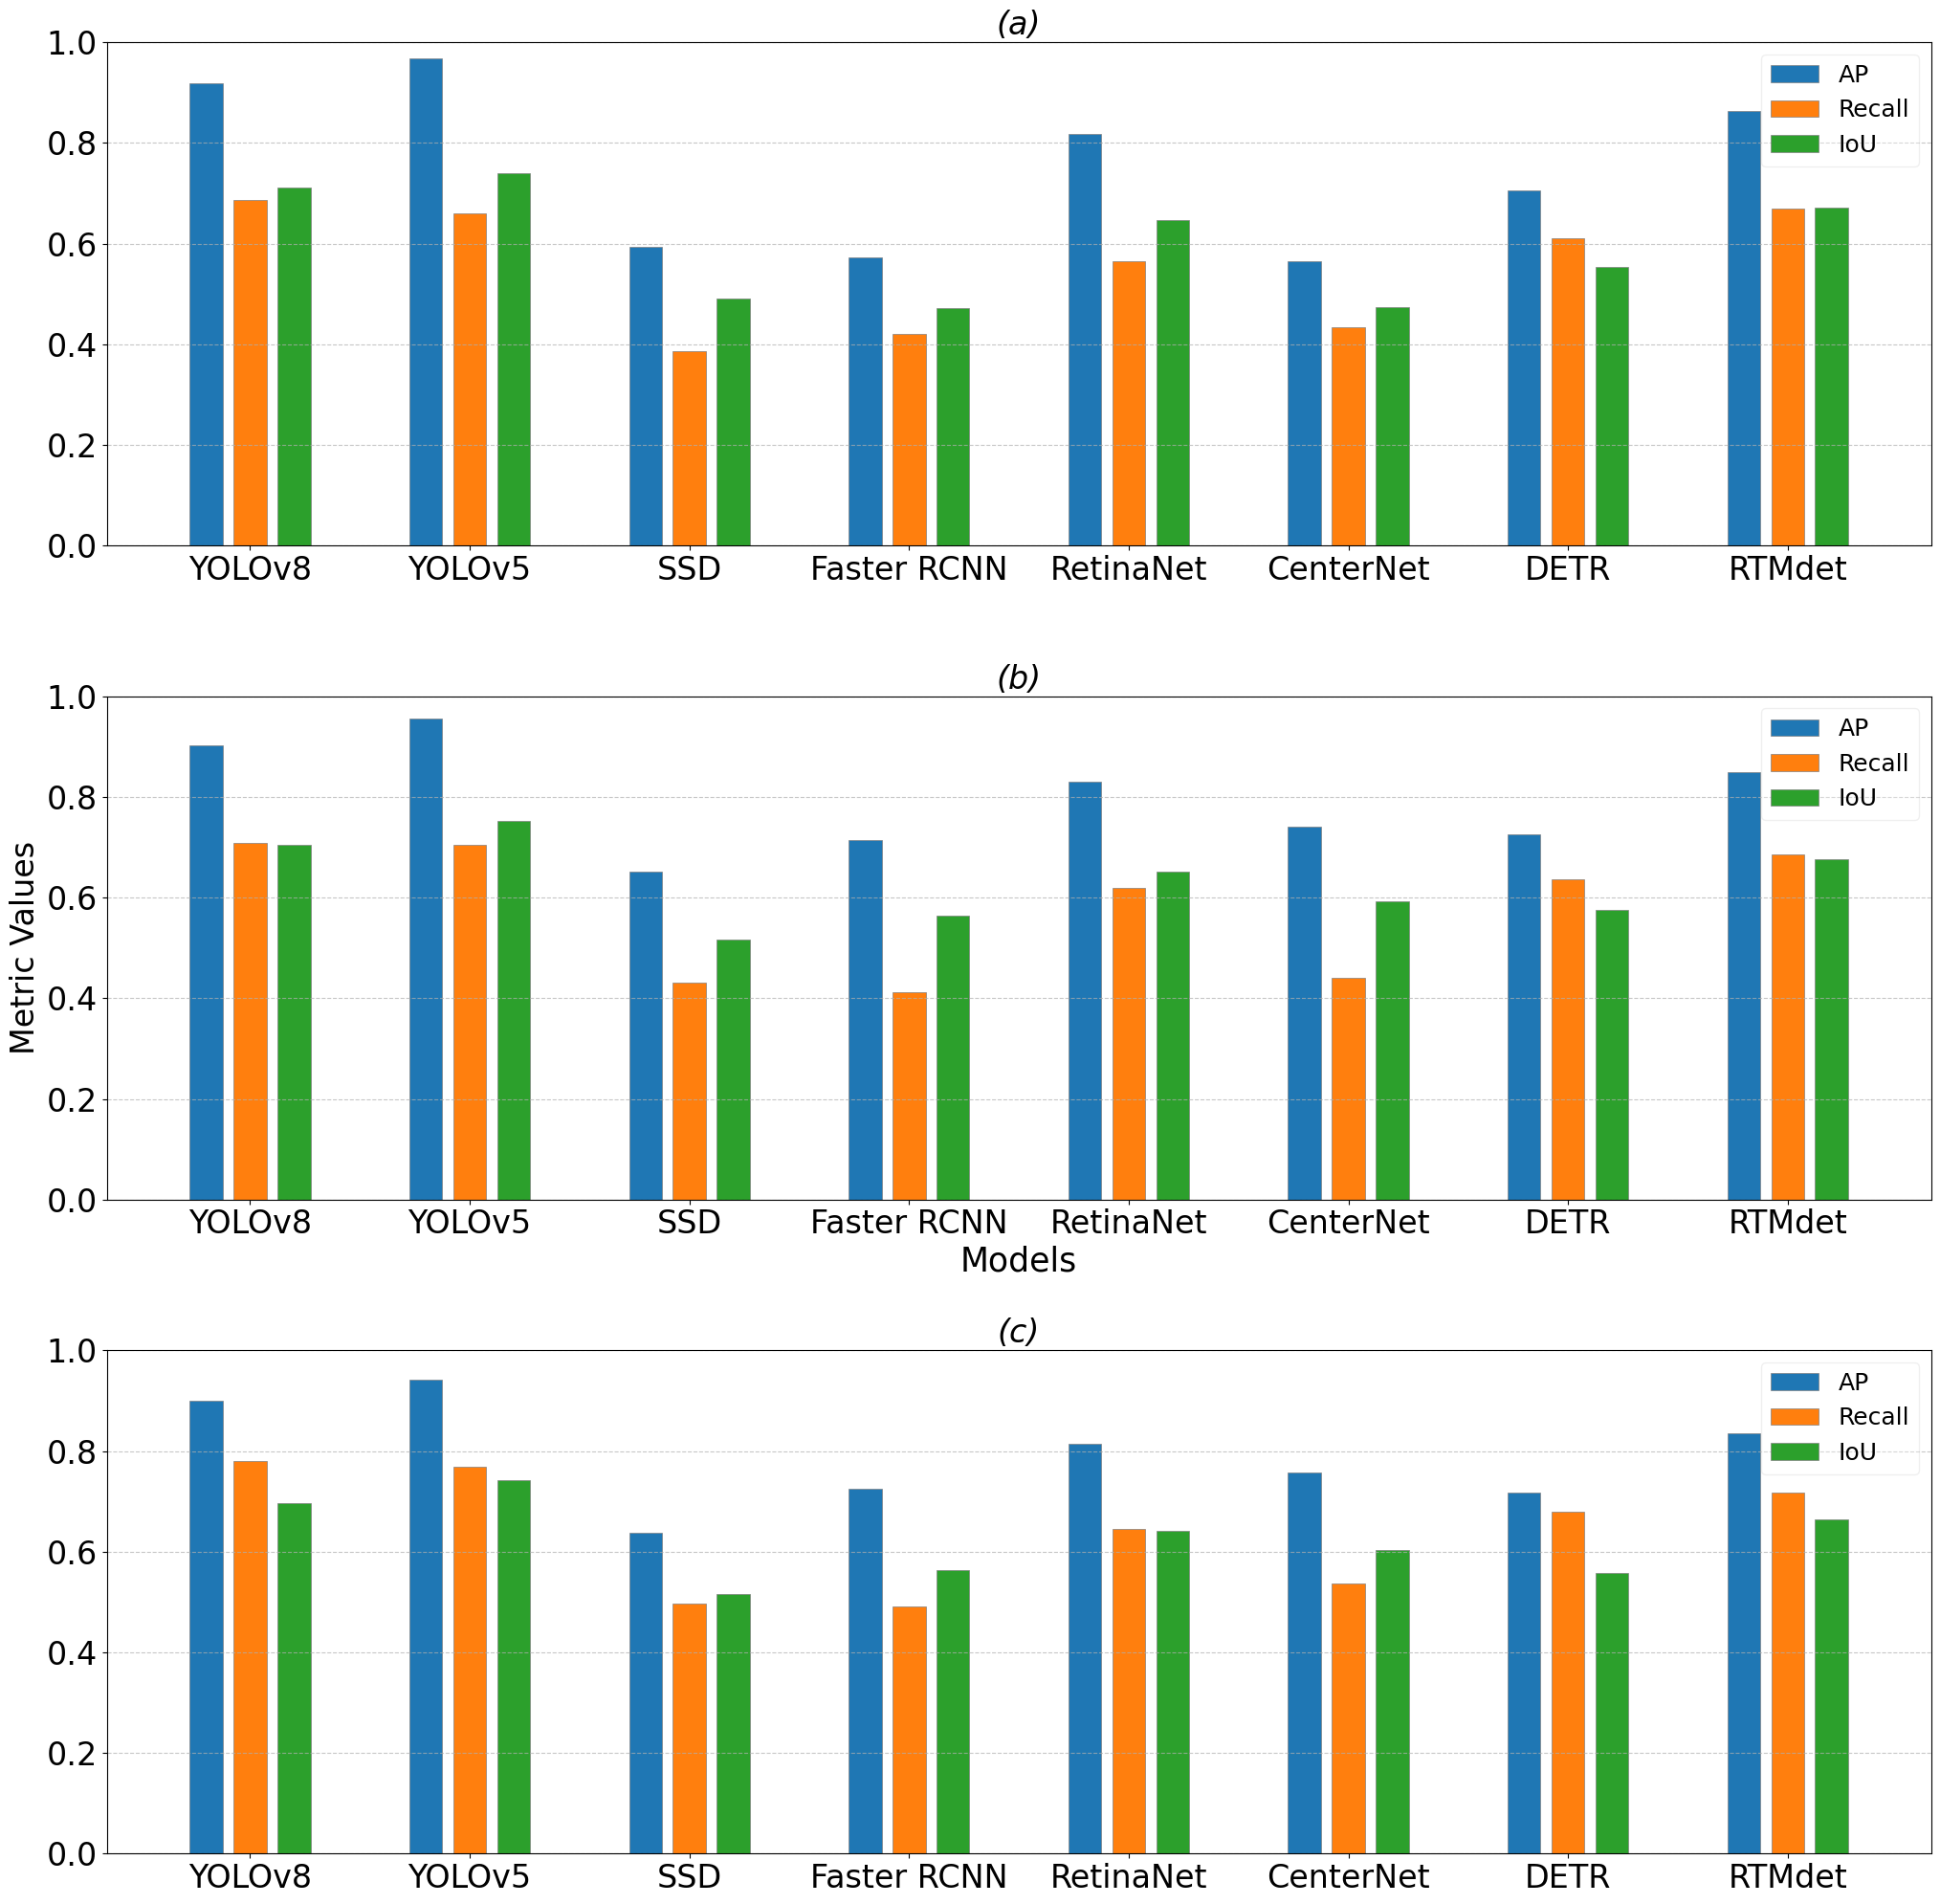

In [20]:
metrics_dict_train = {
    'YOLOv8': {'AP': ap_test_y8, 'Recall': rec_test_y8, 'IoU': iou_test_y8},
    'YOLOv5': {'AP': ap_test_y5, 'Recall': rec_test_y5, 'IoU': iou_test_y5},
    'SSD': {'AP': ap_test_ssd, 'Recall': rec_test_ssd, 'IoU': iou_test_ssd},
    'Faster RCNN': {'AP': ap_test_fasterrcnn, 'Recall': rec_test_fasterrcnn, 'IoU': iou_test_fasterrcnn},
    'RetinaNet': {'AP': ap_test_retinanet, 'Recall': rec_test_retinanet, 'IoU': iou_test_retinanet},
    'CenterNet': {'AP': ap_test_centernet, 'Recall': rec_test_centernet, 'IoU': iou_test_centernet},
    'DETR': {'AP': ap_test_detr, 'Recall': rec_test_detr, 'IoU': iou_test_detr},
    'RTMdet': {'AP': ap_test_rtmdet, 'Recall': rec_test_rtmdet, 'IoU': iou_test_rtmdet},
}

metrics_dict_test = {
    'YOLOv8': {'AP': ap_train_y8, 'Recall': rec_train_y8, 'IoU': iou_train_y8},
    'YOLOv5': {'AP': ap_train_y5, 'Recall': rec_train_y5, 'IoU': iou_train_y5},
    'SSD': {'AP': ap_train_ssd, 'Recall': rec_train_ssd, 'IoU': iou_train_ssd},
    'Faster RCNN': {'AP': ap_train_fasterrcnn, 'Recall': rec_train_fasterrcnn, 'IoU': iou_train_fasterrcnn},
    'RetinaNet': {'AP': ap_train_retinanet, 'Recall': rec_train_retinanet, 'IoU': iou_train_retinanet},
    'CenterNet': {'AP': ap_train_centernet, 'Recall': rec_train_centernet, 'IoU': iou_train_centernet},
    'DETR': {'AP': ap_train_detr, 'Recall': rec_train_detr, 'IoU': iou_train_detr},
    'RTMdet': {'AP': ap_train_rtmdet, 'Recall': rec_train_rtmdet, 'IoU': iou_train_rtmdet},
}

metrics_dict_val = {
    'YOLOv8': {'AP': ap_val_y8, 'Recall': rec_val_y8, 'IoU': iou_val_y8},
    'YOLOv5': {'AP': ap_val_y5, 'Recall': rec_val_y5, 'IoU': iou_val_y5},
    'SSD': {'AP': ap_val_ssd, 'Recall': rec_val_ssd, 'IoU': iou_val_ssd},
    'Faster RCNN': {'AP': ap_val_fasterrcnn, 'Recall': rec_val_fasterrcnn, 'IoU': iou_val_fasterrcnn},
    'RetinaNet': {'AP': ap_val_retinanet, 'Recall': rec_val_retinanet, 'IoU': iou_val_retinanet},
    'CenterNet': {'AP': ap_val_centernet, 'Recall': rec_val_centernet, 'IoU': iou_val_centernet},
    'DETR': {'AP': ap_val_detr, 'Recall': rec_val_detr, 'IoU': iou_val_detr},
    'RTMdet': {'AP': ap_val_rtmdet, 'Recall': rec_val_rtmdet, 'IoU': iou_val_rtmdet},
}


plt.figure(figsize=(20, 20))

# Subplot train
plt.subplot(3, 1, 1)
plot_histogram(metrics_dict_train, title='(a)')

# Subplot test
plt.subplot(3, 1, 2)
plot_histogram(metrics_dict_test, title='(b)')

# Subplot val
plt.subplot(3, 1, 3)
plot_histogram(metrics_dict_val, title='(c)', save_path='output_histogram.png')

# Set x-label and y-label for the middle subplot
plt.subplot(3, 1, 2)
plt.xlabel('Models', fontsize=25)
plt.ylabel('Metric Values', fontsize=24)

# Adjust space between subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig('output_histogram.pdf', bbox_inches='tight')

plt.show()

In [115]:
print('Train: \n')
print(metrics_dict_train)
print('\n\n####################')
print('Test: \n')
print(metrics_dict_test)
print('\n\n####################')
print('Val: \n')
print(metrics_dict_val)
print('\n\n')

Train: 

{'YOLOv8': {'AP': 0.9188191096085833, 'Recall': 0.686368352054362, 'IoU': 0.7108205871654029}, 'YOLOv5': {'AP': 0.9684080573043611, 'Recall': 0.6607032910873588, 'IoU': 0.7398717050106715}, 'SSD': {'AP': 0.5937471884840306, 'Recall': 0.38636773155485743, 'IoU': 0.4918626628499067}, 'Faster RCNN': {'AP': 0.5728135698723934, 'Recall': 0.42152014144886574, 'IoU': 0.4726056893107611}, 'RetinaNet': {'AP': 0.8185757221440613, 'Recall': 0.5659981933064663, 'IoU': 0.6469294090394961}, 'CenterNet': {'AP': 0.5660561871807547, 'Recall': 0.4337292480944571, 'IoU': 0.4734027753669999}, 'DETR': {'AP': 0.704969573015011, 'Recall': 0.6103047649478457, 'IoU': 0.55316445721604}, 'RTMdet': {'AP': 0.8630754947666712, 'Recall': 0.6702188487940449, 'IoU': 0.6714638404033594}}


####################
Test: 

{'YOLOv8': {'AP': 0.9026649088320698, 'Recall': 0.7094760120951376, 'IoU': 0.7044201033646218}, 'YOLOv5': {'AP': 0.9558997359271018, 'Recall': 0.7048267412721908, 'IoU': 0.7523215410661063}, 'SSD